Problem stattement 1

# a. Importing Necssary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, MaxPooling2D, Conv2D

# b. Load the training and testing data

In [2]:
train=pd.read_csv("mnist_train.csv")
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test=pd.read_csv("mnist_test.csv")
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.isnull().sum().sum()

0

In [5]:
x_train=train.drop(['label'],axis=1).values
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
x_train=x_train/255.0

In [7]:
y_train=train['label'].values
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [9]:
x_test=test.drop(['label'],axis=1).values
y_test=test['label'].values

In [10]:
x_test=x_test/255.0

# c. Define the network architecture using Keras

In [20]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.1,momentum=0.9,nesterov=0.1)
model = Sequential()
model.add(Dense(128,input_shape=(784,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer=sgd,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()



# model = Sequential()

# model.add(Dense(128,input_shape=(784,),activation='relu'))
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(32,activation='relu'))
# model.add(Dense(10,activation='softmax'))

# model.compile(optimizer='sgd',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
# model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# d. Train the model using SGD with 11 epochs

In [21]:
history=model.fit(x_train,y_train,validation_split=0.99,epochs=11,batch_size=512)

Epoch 1/11
2/2 [==============================] - 1s 716ms/step - loss: 2.3337 - accuracy: 0.1067 - val_loss: 2.2154 - val_accuracy: 0.2378
Epoch 2/11
2/2 [==============================] - 0s 279ms/step - loss: 2.1969 - accuracy: 0.2383 - val_loss: 2.0747 - val_accuracy: 0.2665
Epoch 3/11
2/2 [==============================] - 0s 252ms/step - loss: 2.0096 - accuracy: 0.3150 - val_loss: 1.8813 - val_accuracy: 0.3120
Epoch 4/11
2/2 [==============================] - 0s 326ms/step - loss: 1.8069 - accuracy: 0.3650 - val_loss: 1.7167 - val_accuracy: 0.3953
Epoch 5/11
2/2 [==============================] - 0s 218ms/step - loss: 1.6323 - accuracy: 0.4083 - val_loss: 1.7339 - val_accuracy: 0.3689
Epoch 6/11
2/2 [==============================] - 0s 277ms/step - loss: 1.5889 - accuracy: 0.4017 - val_loss: 1.3744 - val_accuracy: 0.4892
Epoch 7/11
2/2 [==============================] - 0s 304ms/step - loss: 1.2366 - accuracy: 0.5733 - val_loss: 1.0098 - val_accuracy: 0.6972
Epoch 8/11
2/2 [====

# e. Evaluate the network

In [22]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.7542 - accuracy: 0.7738


# f. Plot the training loss and accuracy

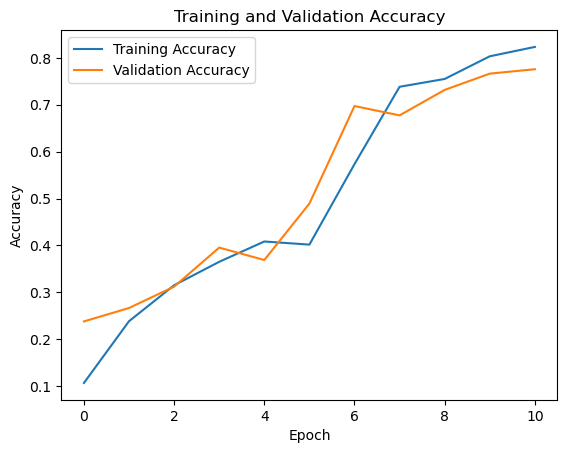

In [23]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


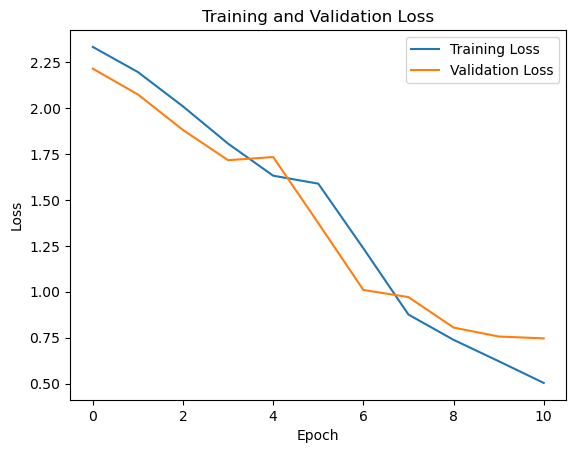

In [24]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


In [25]:
pred=model.predict(x_test)

313/313 [==============================] - 0s 913us/step


In [26]:
print(y_test)
print(np.argmax(pred,axis=1))

[7 2 1 ... 4 5 6]
[7 2 1 ... 9 5 6]


Predicted Class:
2


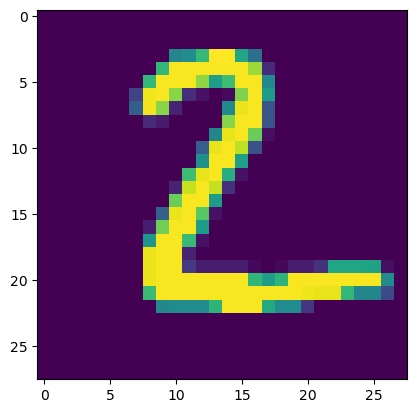

In [27]:
idx=1
plt.imshow(x_test[idx].reshape(28,28))
print("Predicted Class:")
print(pred[idx].argmax())